In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import six

from anchor.visualize import MODALITY_TO_COLOR, MODALITY_ORDER, MODALITY_PALETTE
modality_order = MODALITY_ORDER


%matplotlib inline

%load_ext autoreload
%autoreload 2

folder = 'figures' #'/home/obotvinnik/Dropbox/figures2/singlecell_pnm/figure4_voyages'

import flotilla

flotilla_dir = '/projects/ps-yeolab/obotvinnik/flotilla_projects'
study = flotilla.embark('singlecell_pnm_figure5_voyages', flotilla_dir=flotilla_dir)

2017-01-14 11:06:06	Reading datapackage from /projects/ps-yeolab/obotvinnik/flotilla_projects/singlecell_pnm_figure5_voyages/datapackage.json
2017-01-14 11:06:06	Parsing datapackage to create a Study object
https://s3-us-west-2.amazonaws.com/flotilla-projects/ercc/ERCC_Controls.txt has not been downloaded before.


/home/obotvinnik/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
Error loading species hg19 data: HTTP Error 404: Not Found

2017-01-14 11:06:55 	Initializing Study
2017-01-14 11:06:55 	Initializing Predictor configuration manager for Study
2017-01-14 11:06:55	Predictor ExtraTreesClassifier is of type <class 'sklearn.ensemble.forest.ExtraTreesClassifier'>
2017-01-14 11:06:55	Added ExtraTreesClassifier to default predictors
2017-01-14 11:06:55	Predictor ExtraTreesRegressor is of type <class 'sklearn.ensemble.forest.ExtraTreesRegressor'>
2017-01-14 11:06:55	Added ExtraTreesRegressor to default predictors
2017-01-14 11:06:55	Predictor GradientBoostingClassifier is of type <class 'sklearn.ensemble.gradient_boosting.GradientBoostingClassifier'>
2017-01-14 11:06:55	Added GradientBoostingClassifier to default predictors
2017-01-14 11:06:55	Predictor GradientBoostingRegressor is of type <class 'sklearn.ensemble.gradient_boosting.GradientBoostingRegressor'>
2017-01-14 11:06:55	Added GradientBoostingRegressor to default predictors
2017-01-14 11:06:55 	Loading metadata
2017-01-14 11:06:55	Loading expression data
2017-0

In [15]:
sns.set(style='white', context='paper', rc={'font.sans-serif':'Arial', 'pdf.fonttype': 42})


In [2]:
figure_folder = '{}/002_waypointplots'.format(folder)
! mkdir $figure_folder

mkdir: cannot create directory `figures/002_waypointplots': File exists


In [3]:
study.supplemental.voyages.head()

,event_id,$\Delta x$,$\Delta y$,magnitude,group1,group2,direction,transition,group1_modality,group2_modality
0,isoform1=junction:chr10:101163392-101165512:-|...,0.000000,0.033333,0.033333,iPSC,NPC,$\nwarrow$,iPSC-NPC,included,included
1,isoform1=junction:chr10:101163392-101165512:-|...,0.000000,0.033333,0.033333,iPSC,MN,$\nwarrow$,iPSC-MN,included,included
2,isoform1=junction:chr10:101163392-101165512:-|...,0.000000,0.000000,0.000000,NPC,MN,NaN,NPC-MN,included,included
3,isoform1=junction:chr10:101476219-101480743:-|...,0.166667,-0.041667,0.171796,iPSC,NPC,$\searrow$,iPSC-NPC,included,bimodal
4,isoform1=junction:chr10:101476219-101480743:-|...,0.052632,0.072368,0.089483,iPSC,MN,$\nearrow$,iPSC-MN,included,bimodal


In [7]:
study.phenotype_transitions

[(u'iPSC', u'NPC'), (u'NPC', u'MN')]

In [20]:
transition_order = ['iPSC-NPC', 'iPSC-MN']

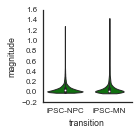

In [21]:
sns.factorplot(x='transition', y='magnitude', size=2,
               data=study.supplemental.voyages, kind='violin', cut=True, 
               order=transition_order, color='green', linewidth=1)

In [18]:
voyage_cutoff = 0.2

In [22]:
large_voyages = study.supplemental.voyages.query('(magnitude > @voyage_cutoff) & (transition in @transition_order)')
print(large_voyages.shape)
large_voyages.head()

(1233, 10)


,event_id,$\Delta x$,$\Delta y$,magnitude,group1,group2,direction,transition,group1_modality,group2_modality
6,isoform1=junction:chr10:101507148-101514285:+|...,0.291498,-0.089069,0.304802,iPSC,NPC,$\searrow$,iPSC-NPC,bimodal,bimodal
8,isoform1=junction:chr10:101995522-101997778:-|...,0.181818,-0.150568,0.236069,iPSC,NPC,$\searrow$,iPSC-NPC,included,bimodal
96,isoform1=junction:chr10:105152224-105156165:-|...,0.527101,0.000000,0.527101,iPSC,NPC,$\searrow$,iPSC-NPC,excluded,excluded
97,isoform1=junction:chr10:105152224-105156165:-|...,0.431579,0.018182,0.431962,iPSC,MN,$\nearrow$,iPSC-MN,excluded,excluded
114,isoform1=junction:chr10:1089334-1094803:-|isof...,-0.031230,0.207222,0.209562,iPSC,NPC,$\nwarrow$,iPSC-NPC,uncategorized,included


In [26]:
large_voyages_modalities = large_voyages.groupby(['transition', 'group1_modality', 'group2_modality']).size().reset_index()
large_voyages_modalities = large_voyages_modalities.rename(columns={0:'n_exons'})
large_voyages_modalities.head()

,transition,group1_modality,group2_modality,n_exons
0,iPSC-MN,bimodal,bimodal,147
1,iPSC-MN,bimodal,excluded,55
2,iPSC-MN,bimodal,included,58
3,iPSC-MN,bimodal,uncategorized,1
4,iPSC-MN,excluded,bimodal,87


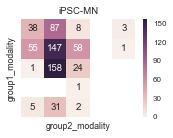

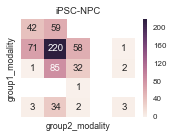

In [45]:
import colorsys


for transition, df in large_voyages_modalities.groupby('transition'):
    df2d = df.pivot(index='group1_modality', columns='group2_modality', values='n_exons')
    df2d = df2d.loc[MODALITY_ORDER, MODALITY_ORDER]
    mask = df2d.isnull()
    df2d = df2d.fillna(0)
    df2d = df2d.astype(int)
    
    fig, ax = plt.subplots(figsize=(2.5, 2))
    
    
    sns.heatmap(df2d, annot=True, fmt='d', mask=mask)
    #cbar_kws=dict(label='% AS exons in both iPSC in NPC'))
    #, annot=True, fmt='.1f')

#     # fig.axes[-1].yaxis.locator_params()

#     raw = ipsc_mn_modality_2d.ix[::-1]

#     mesh = ax.collections[0]

#     fmt = 'g'

#     mesh.update_scalarmappable()
#     xpos, ypos = np.meshgrid(ax.get_xticks(), ax.get_yticks())
#     for x, y, percentage, val, color in zip(xpos.flat, ypos.flat, 
#                                 mesh.get_array(), raw.values.flat, mesh.get_facecolors()):
#     #     print val
#         if percentage is not np.ma.masked:
#             _, l, _ = colorsys.rgb_to_hls(*color[:3])
#             text_color = ".15" if l > .5 else "w"
#             val = ("{:" + fmt + "}").format(val)
#             text_kwargs = dict(color=text_color, ha="center", va="center")
#     #         text_kwargs.update(self.annot_kws)
#             ax.text(x, y, val, **text_kwargs)
#         else:
#             text_kwargs = dict(color='.15', ha="center", va="center")
#             ax.text(x, y, 0, **text_kwargs)
    ax.set(xticks=[], yticks=[], title=transition)
    fig.tight_layout()
    fig.savefig('{}/large_voyages_modality_heatmap_{}.pdf'.format(folder, transition))

## Arrowplots of the voyages

In [ ]:

for phenotype1, phenotype2 in transition_order:
    fig, ax = plt.subplots(figsize=(1.5, 1.5))

    for event in ipsc_lower_triangle_in_mn_waypoints.index:
        try:
            x1, y1 = study.supplemental.waypoints.loc[(phenotype1, event)]
            x2, y2 = study.supplemental.waypoints.loc[(phenotype2, event)]
            if np.isnan(x2):
                pass
        #         ax.scatter(x1, y1, color=study.phenotype_to_color['iPSC'], linewidth=0.5, edgecolor='k', zorder=1, s=50)
            else:
                dx = x2 - x1
                dy = y2 - y1
                ax.arrow(x1, y1, dx, dy, facecolor='darkgreen', alpha=0.5)
        except KeyError:
            pass
    ax.set(xlim=(0, 1), ylim=(0, 1), xlabel='~0', ylabel='~1', xticks=[], yticks=[], 
           title='{} to {}'.format(phenotype1, phenotype2))
    sns.despine()
#     fig.tight_layout()
    fig.savefig('{}/waypoints_lower_triangle_in_{}_to_{}_arrows.pdf'.format(waypoint_folder, phenotype1, phenotype2))